In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [94]:
df = pd.read_csv('/content/transaction_dataset.csv')

In [95]:
df.shape

(9841, 51)

In [96]:
df.dtypes

Unnamed: 0                                                int64
Index                                                     int64
Address                                                  object
FLAG                                                      int64
Avg min between sent tnx                                float64
Avg min between received tnx                            float64
Time Diff between first and last (Mins)                 float64
Sent tnx                                                  int64
Received Tnx                                              int64
Number of Created Contracts                               int64
Unique Received From Addresses                            int64
Unique Sent To Addresses                                  int64
min value received                                      float64
max value received                                      float64
avg val received                                        float64
min val sent                            

In [97]:
df.columns = df.columns.str.strip().str.replace(r'\b\s+\b','_',regex=True)
df.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg_min_between_sent_tnx',
       'Avg_min_between_received_tnx',
       'Time_Diff_between_first_and_last (Mins)', 'Sent_tnx', 'Received_Tnx',
       'Number_of_Created_Contracts', 'Unique_Received_From_Addresses',
       'Unique_Sent_To_Addresses', 'min_value_received', 'max_value_received',
       'avg_val_received', 'min_val_sent', 'max_val_sent', 'avg_val_sent',
       'min_value_sent_to_contract', 'max_val_sent_to_contract',
       'avg_value_sent_to_contract',
       'total_transactions (including_tnx_to_create_contract',
       'total_Ether_sent', 'total_ether_received',
       'total_ether_sent_contracts', 'total_ether_balance', 'Total_ERC20_tnxs',
       'ERC20_total_Ether_received', 'ERC20_total_ether_sent',
       'ERC20_total_Ether_sent_contract', 'ERC20_uniq_sent_addr',
       'ERC20_uniq_rec_addr', 'ERC20_uniq_sent_addr.1',
       'ERC20_uniq_rec_contract_addr', 'ERC20_avg_time_between_sent_tnx',
       'ERC20_avg_time_be

In [98]:
#check for presence of duplicate
df.duplicated(subset='Index').sum()

5112

In [99]:
#propotion of flag in overall data
df['FLAG'].value_counts(normalize=True)

FLAG
0    0.778579
1    0.221421
Name: proportion, dtype: float64

In [100]:
#Propotion of flag in duplicate data
df[df.duplicated(subset='Index')]['FLAG'].value_counts(normalize=True)

FLAG
0    0.573748
1    0.426252
Name: proportion, dtype: float64

In [101]:
#check duplicates witout index column
df.duplicated().sum()

0

In [102]:
#drop the unwanted columns
df = df.drop(columns=['Unnamed: 0','Index','Address'])

In [103]:
#seperate the categorical values
categories = df.select_dtypes(include = 'object').columns
categories

Index(['ERC20_most_sent_token_type', 'ERC20_most_rec_token_type'], dtype='object')

In [104]:
#inspect categoricals
for i in df[categories].columns:
  print(f'the categorical column {i} has {df[i].nunique()} unique values and {df[i].isnull().sum()} missing values')

the categorical column ERC20_most_sent_token_type has 304 unique values and 2697 missing values
the categorical column ERC20_most_rec_token_type has 466 unique values and 871 missing values


In [105]:
df['ERC20_most_sent_token_type'].isnull().sum()

2697

In [106]:
#seperate numerical variables
numerics = df.select_dtypes(include='number').columns
numerics

Index(['FLAG', 'Avg_min_between_sent_tnx', 'Avg_min_between_received_tnx',
       'Time_Diff_between_first_and_last (Mins)', 'Sent_tnx', 'Received_Tnx',
       'Number_of_Created_Contracts', 'Unique_Received_From_Addresses',
       'Unique_Sent_To_Addresses', 'min_value_received', 'max_value_received',
       'avg_val_received', 'min_val_sent', 'max_val_sent', 'avg_val_sent',
       'min_value_sent_to_contract', 'max_val_sent_to_contract',
       'avg_value_sent_to_contract',
       'total_transactions (including_tnx_to_create_contract',
       'total_Ether_sent', 'total_ether_received',
       'total_ether_sent_contracts', 'total_ether_balance', 'Total_ERC20_tnxs',
       'ERC20_total_Ether_received', 'ERC20_total_ether_sent',
       'ERC20_total_Ether_sent_contract', 'ERC20_uniq_sent_addr',
       'ERC20_uniq_rec_addr', 'ERC20_uniq_sent_addr.1',
       'ERC20_uniq_rec_contract_addr', 'ERC20_avg_time_between_sent_tnx',
       'ERC20_avg_time_between_rec_tnx', 'ERC20_avg_time_between_r

In [107]:
#inspect feature
for i in df[numerics].columns:
  print(f'the numeric column {i} has {df[i].nunique()} unique values and {df[i].isnull().sum()} missing values')

the numeric column FLAG has 2 unique values and 0 missing values
the numeric column Avg_min_between_sent_tnx has 5013 unique values and 0 missing values
the numeric column Avg_min_between_received_tnx has 6223 unique values and 0 missing values
the numeric column Time_Diff_between_first_and_last (Mins) has 7810 unique values and 0 missing values
the numeric column Sent_tnx has 641 unique values and 0 missing values
the numeric column Received_Tnx has 727 unique values and 0 missing values
the numeric column Number_of_Created_Contracts has 20 unique values and 0 missing values
the numeric column Unique_Received_From_Addresses has 256 unique values and 0 missing values
the numeric column Unique_Sent_To_Addresses has 258 unique values and 0 missing values
the numeric column min_value_received has 4589 unique values and 0 missing values
the numeric column max_value_received has 6302 unique values and 0 missing values
the numeric column avg_val_received has 6767 unique values and 0 missing 

In [108]:
#inspect feature with constant variance
constant_cols = df[numerics].var()[df[numerics].var()==0].index
len(constant_cols)

7

In [109]:
#drop coonstant columns
df.drop(constant_cols,axis=1,inplace=True)

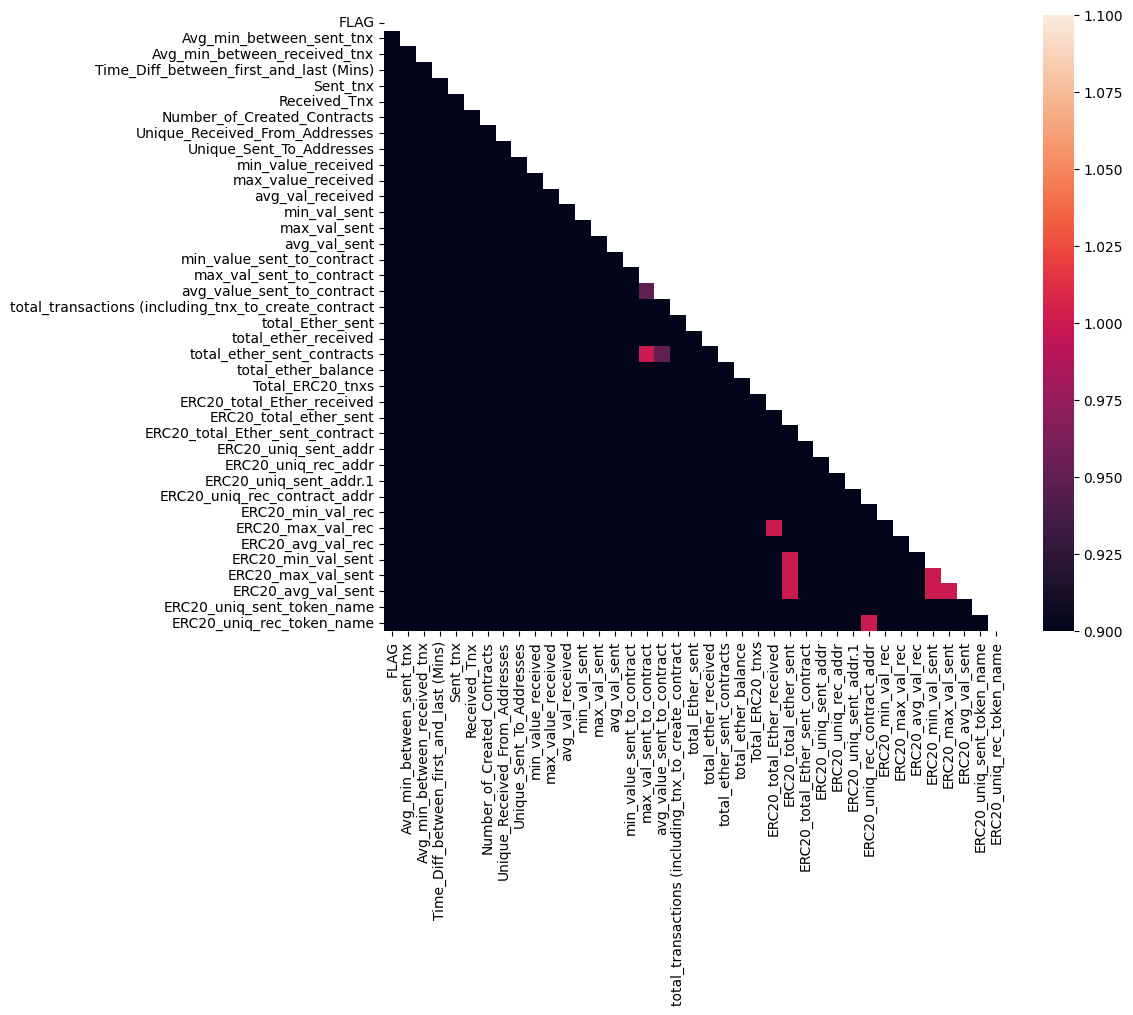

In [139]:
#corrrelation matrix using heatmap
plt.figure(figsize=(10,8))
numerics=df.select_dtypes(include='number').columns
corr = df[numerics].corr()
mask= np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,mask = mask,annot=False,vmin=1,vmax=1)
plt.show()

,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last (Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,...,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,ERC20_most_sent_token_type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.00,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,39.0,57.0,Cofoundit,Numeraire
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,0.00,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,1.0,7.0,Livepeer Token,Livepeer Token
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.00,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,8.0,NaN,XENON
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,0.00,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,1.0,11.0,Raiden,XENON
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.00,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,...,0.00,1.337000e+00,0.668500,0.000000,0.000000e+00,0.000000,0.0,2.0,,GSENetwork
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,13.37,1.337000e+01,13.370000,0.000000,0.000000e+00,0.000000,0.0,1.0,,Blockwell say NOTSAFU
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,...,0.00,1.500000e+03,300.693901,0.000000,0.000000e+00,0.000000,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


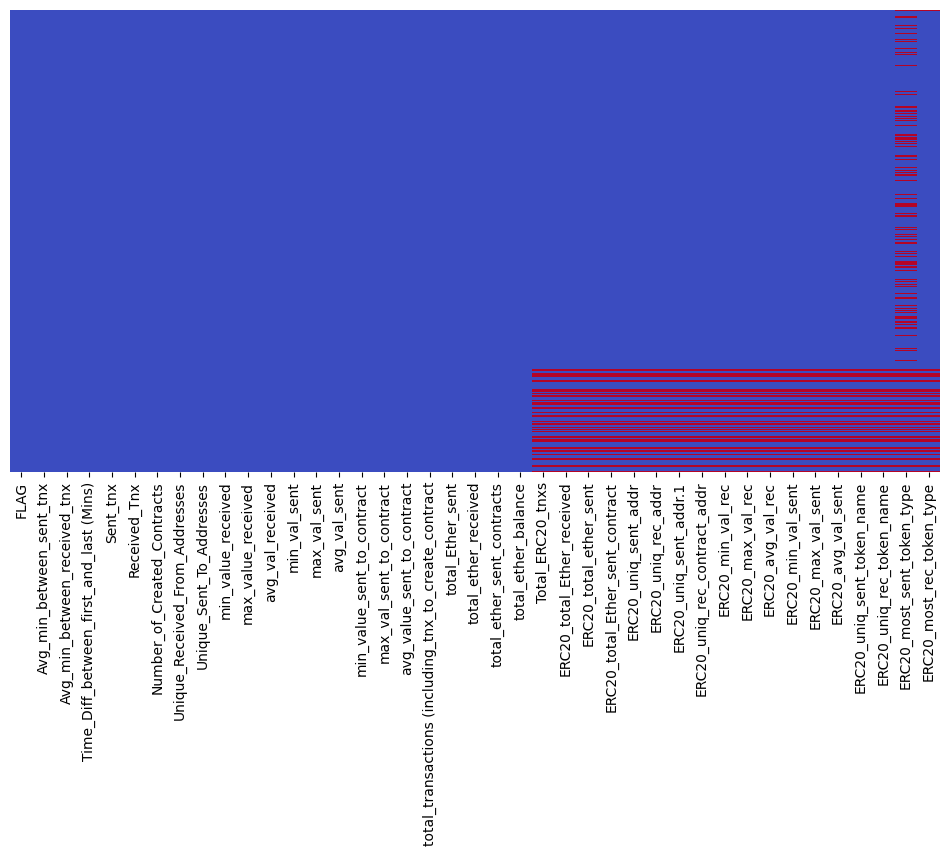

In [112]:
#visualize missing data
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cmap='coolwarm',cbar=False)
plt.yticks([])
plt.show()

In [113]:
missing_rows =df.isnull().any(axis=1).sum()
missing_rows

2720

In [114]:
#Flag variable with missing data
missing_mask=df.isnull().any(axis=1)
print(df.loc[missing_mask,'FLAG'].value_counts())
print(" ")
print(round(df.loc[missing_mask,'FLAG'].value_counts(normalize=True),2))

FLAG
0    1891
1     829
Name: count, dtype: int64
 
FLAG
0    0.7
1    0.3
Name: proportion, dtype: float64


In [115]:
#Target distribution
print(df['FLAG'].value_counts())
print(" ")
print(round(df['FLAG'].value_counts(normalize=True),2))

FLAG
0    7662
1    2179
Name: count, dtype: int64
 
FLAG
0    0.78
1    0.22
Name: proportion, dtype: float64


In [116]:
#checking rows withouts missing data
print(df[~missing_mask].shape)
df_sub=df[~missing_mask]


(7121, 41)


In [117]:
#Splitting tha data into training and testing
X =df_sub.drop('FLAG', axis=1)
y = df_sub['FLAG']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)


In [118]:
!pip install category_encoders

In [119]:
#initializing target encoder
from category_encoders import TargetEncoder
encoder = TargetEncoder(cols=categories)

In [120]:
#Fit and transform
X_train_encoded=encoder.fit_transform(X_train,y_train)
X_test_encoded=encoder.transform(X_test)


In [121]:
#Conactinating X nad Y
train = pd.concat([X_train_encoded,y_train],axis=1)
test = pd.concat([X_test_encoded,y_test],axis=1)

In [122]:
#isolation forest model
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(contamination='auto',random_state=123)
isolation_forest.fit(train)


IsolationForest(random_state=123)

In [123]:
#predict outliers on both traning and testing stes
#-1 inicatesand outlier, 1 indicates an inlier
anomaly_train_pred = isolation_forest.predict(train)

In [124]:
anomaly_test_pred = isolation_forest.predict(test)

In [125]:
is_train = np.sum(anomaly_train_pred == -1)
print("No. of outliers present in training set",is_train)
is_test = np.sum(anomaly_test_pred ==-1)
print("No. of outliers present in test set",is_test)


No. of outliers present in training set 196
No. of outliers present in test set 55


In [126]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,random_state=123)
X_train_tsne = tsne.fit_transform(X_train_encoded)

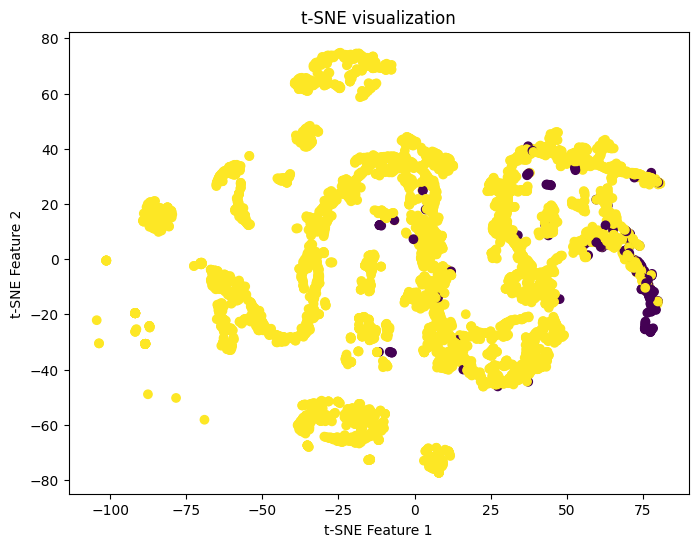

In [127]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1],c=anomaly_train_pred)
plt.title('t-SNE visualization')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

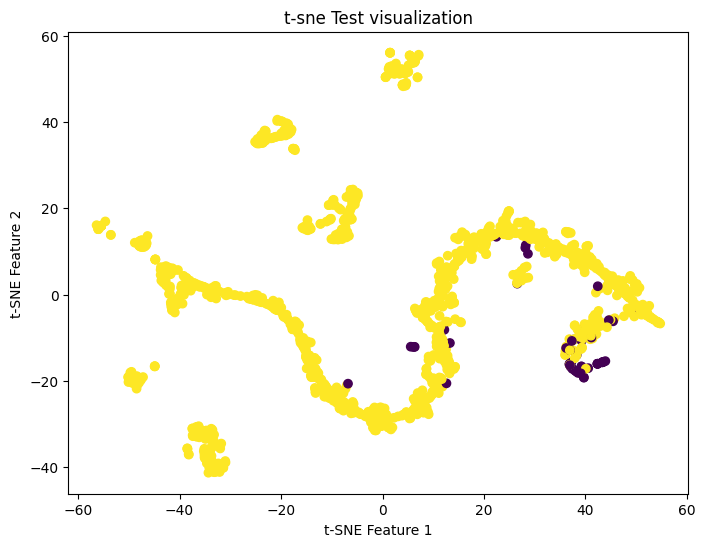

In [128]:
X_test_tsne = tsne.fit_transform(X_test_encoded)
plt.figure(figsize=(8,6))
plt.scatter(X_test_tsne[:,0],X_test_tsne[:,1],c=anomaly_test_pred)
plt.title("t-sne Test visualization")
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

In [140]:
# DBSCAN
from sklearn.cluster import DBSCAN
#DBSCAN Model
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan.fit(X_train_encoded)


DBSCAN(eps=2)

In [141]:
#predict outliers on both traning and testing stes
#-1 inicatesand outlier, 1 indicates an inlier
anomaly_train_DBSCAN = dbscan.fit_predict(X_train_encoded)
anomaly_test_DBSCAN = dbscan.fit_predict(X_test_encoded)
is_train = np.sum(anomaly_train_pred == -1)
print("No. of outliers present in training set",is_train)
is_test = np.sum(anomaly_test_pred ==-1)
print("No. of outliers present in test set",is_test)


No. of outliers present in training set 196
No. of outliers present in test set 55


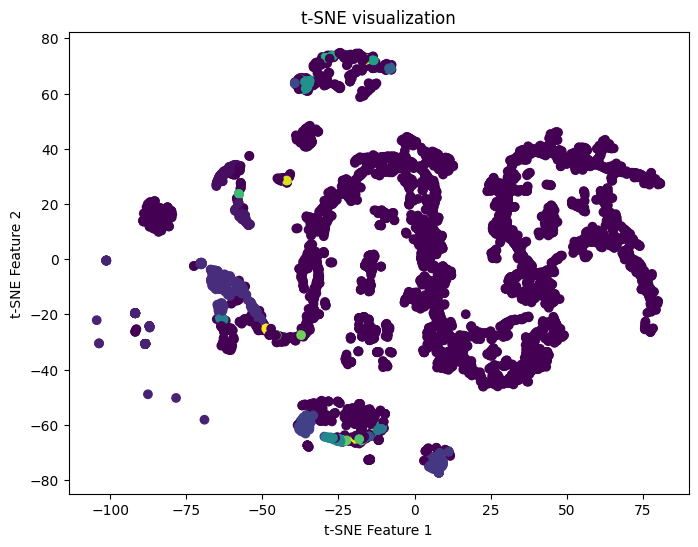

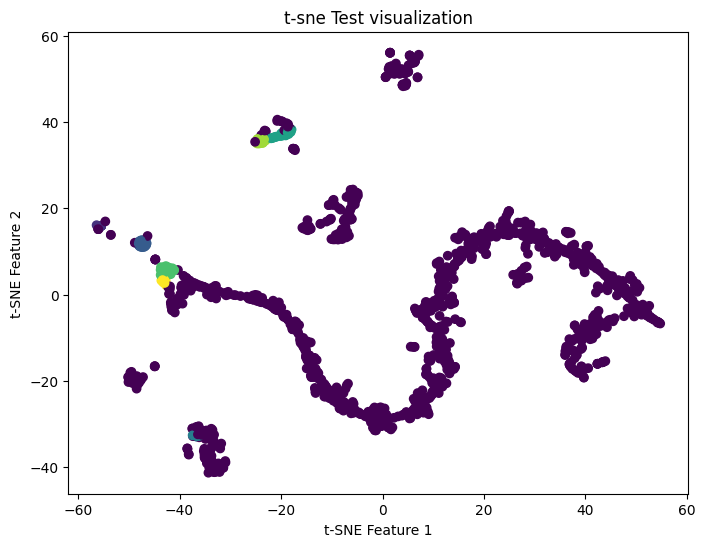

In [130]:
#t-SNE visualization
tsne = TSNE(n_components=2,random_state=123)
X_train_tsne = tsne.fit_transform(X_train_encoded)
plt.figure(figsize=(8,6))
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1],c=anomaly_train_DBSCAN)
plt.title('t-SNE visualization')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()
X_test_tsne = tsne.fit_transform(X_test_encoded)
plt.figure(figsize=(8,6))
plt.scatter(X_test_tsne[:,0],X_test_tsne[:,1],c=anomaly_test_DBSCAN)
plt.title("t-sne Test visualization")
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()


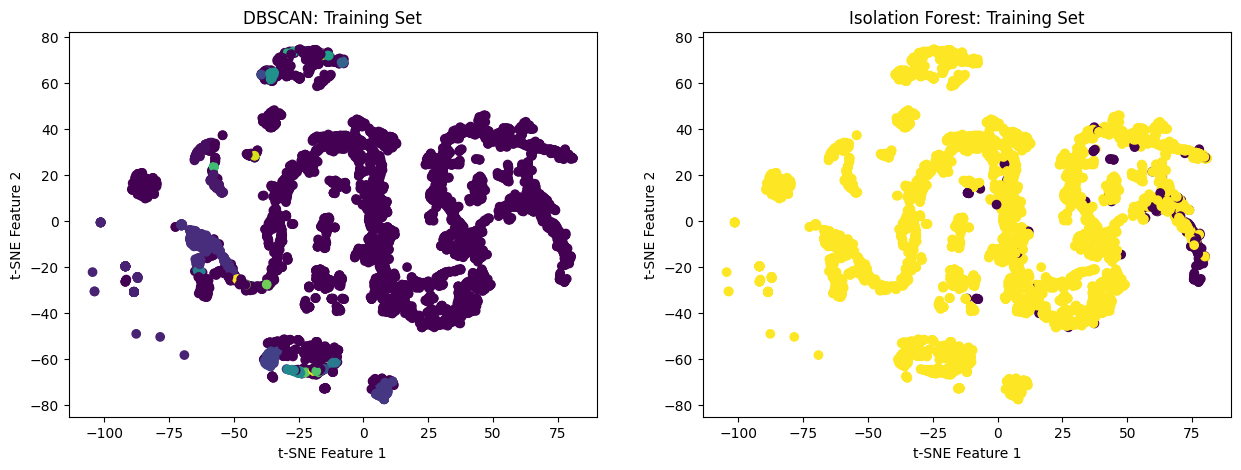

In [131]:
# Plot the results of DBSCAN and Isolation Forest
plt.figure(figsize=(15, 5))

# Subplot for DBSCAN
plt.subplot(1, 2, 1)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=anomaly_train_DBSCAN)
plt.title('DBSCAN: Training Set')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')

# Subplot for Isolation Forest
plt.subplot(1, 2, 2)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=anomaly_train_pred)
plt.title('Isolation Forest: Training Set')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')

plt.show()


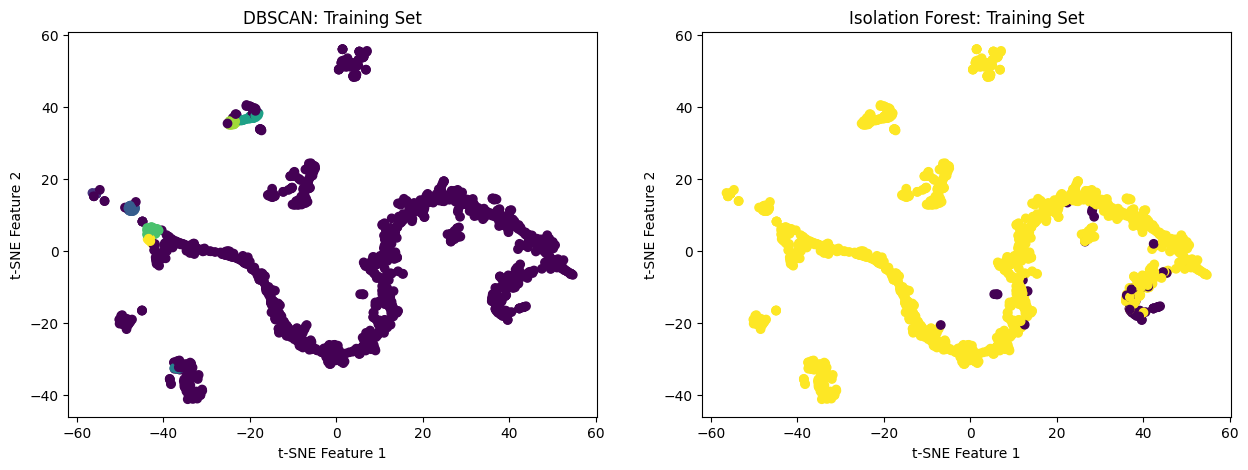

In [133]:
import matplotlib.pyplot as plt
# Plot the results of DBSCAN and Isolation Forest
plt.figure(figsize=(15, 5))

# Subplot for DBSCAN
plt.subplot(1, 2, 1)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=anomaly_test_DBSCAN)
plt.title('DBSCAN: Training Set')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')

# Subplot for Isolation Forest
plt.subplot(1, 2, 2)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=anomaly_test_pred)
plt.title('Isolation Forest: Training Set')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')

plt.show()


In [135]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for DBSCAN and Isolation Forest
silhouette_DBSCAN = silhouette_score(X_train_encoded, anomaly_train_DBSCAN)
silhouette_IF = silhouette_score(X_train_encoded, anomaly_train_pred)

# Print the silhouette scores
print("Silhouette score for DBSCAN:", silhouette_DBSCAN)
print("Silhouette score for Isolation Forest:", silhouette_IF)

# Compare the silhouette scores
if silhouette_DBSCAN > silhouette_IF:
  print("DBSCAN has a higher silhouette score, indicating better cluster separation.")
elif silhouette_DBSCAN < silhouette_IF:
  print("Isolation Forest has a higher silhouette score, indicating better cluster separation.")
else:
  print("The silhouette scores for both models are comparable.")


Silhouette score for DBSCAN: -0.750977719821238
Silhouette score for Isolation Forest: 0.9331378117433264
Isolation Forest has a higher silhouette score, indicating better cluster separation.
